In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import geopandas as geopd
from shapely.geometry import Point

In [2]:
Gdelt_comprised_ds = pd.read_csv("Data/GDELT_31_05_2013_To_01_07_2013.csv")

In [3]:
len(Gdelt_comprised_ds)

4145

In [4]:
print(Gdelt_comprised_ds.columns)

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
       'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone',
       'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode',
       'Actor1Geo_ADM1Code', 'Actor1Geo_Lat', 'Actor1Geo_Long',
       'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName',
       'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'Action

In [5]:
Gdelt_comprised_ds.head(5)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,255663475,20130605,201306,2013,2013.4247,EDU,STUDENT,NaN,NaN,NaN,...,NaN,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.bbc.co.uk/news/world-europe-22753761
1,255683531,20130605,201306,2013,2013.4247,TUR,TURKISH,TUR,NaN,NaN,...,NaN,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.latimes.com/news/world/worldnow/la-...
2,255683534,20130605,201306,2013,2013.4247,TUR,TURKEY,TUR,NaN,NaN,...,NaN,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://learning.blogs.nytimes.com/2013/06/05/p...
3,255674072,20130605,201306,2013,2013.4247,LAB,TRADE UNION,NaN,NaN,NaN,...,NaN,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://news.yahoo.com/live-occupied-gezi-park-...
4,255667402,20130605,201306,2013,2013.4247,GOV,GOVERNMENT,NaN,NaN,NaN,...,NaN,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.nzherald.co.nz/world/news/article.c...


In [6]:
Gdelt_cameo_codes = Gdelt_comprised_ds.EventCode.unique()

In [7]:
CAMEO_code = pd.read_csv('Data/cameo_code.csv',error_bad_lines=False)

In [8]:
CAMEO_code['case_clean'] = CAMEO_code[CAMEO_code.columns[1:]].apply(lambda x: ' '.join(x.dropna()),axis=1)


In [9]:
CAMEO_code = CAMEO_code[['CAMEO_code','CAMEO_case', 'case_clean']]

In [10]:
CAMEO_code_case = CAMEO_code.set_index(CAMEO_code.CAMEO_case)

In [11]:
protest_codes = CAMEO_code_case.loc[CAMEO_code_case.iloc[:,1].str.contains(r'(protest|Protest|Demonstrate|demonstrate)')] ["CAMEO_code"]

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [12]:
protest_codes

CAMEO_case
Demonstrate for leadership change                       1411
Demonstrate for policy change                           1412
Demonstrate for rights                                  1413
Demonstrate for change in institutions                  1414
Protest violently                                        145
Engage in violent protest for leadership change         1451
Engage in violent protest for policy change             1452
Engage in violent protest for rights                    1453
Engage in violent protest for change in institutions    1454
Demonstrate military or police power                     150
Name: CAMEO_code, dtype: int64

In [13]:
Gedlt_protest =  Gdelt_comprised_ds [Gdelt_comprised_ds["EventCode"].isin (protest_codes.values)]

In [14]:
len(Gedlt_protest)

551

In [15]:
CAMEO_code_case[CAMEO_code_case['CAMEO_code'].isin(Gdelt_cameo_codes)]

,CAMEO_code,CAMEO_case,case_clean
CAMEO_case,,,
Engage in political dissent,140,Engage in political dissent,Engage in political dissent not specified bel...
Demonstrate for leadership change,1411,Demonstrate for leadership change,Demonstrate for leadership change
Demonstrate for policy change,1412,Demonstrate for policy change,Demonstrate for policy change
Demonstrate for rights,1413,Demonstrate for rights,Demonstrate for rights
Conduct hunger strike,142,Conduct hunger strike,Conduct hunger strike not specified below
Conduct strike or boycott,143,Conduct strike or boycott,Conduct strike or boycott not specified below
Obstruct passage,144,Obstruct passage,Obstruct passage block not specified below
Protest violently,145,Protest violently,Protest violently riot not specified below


In [16]:
len(Gdelt_comprised_ds[Gdelt_comprised_ds["EventCode"] == 145])

495

In [17]:
Gdelt_comprised_ds["Event_date_dt"] = pd.to_datetime(Gdelt_comprised_ds["SQLDATE"],format='%Y%m%d')

In [18]:
Gdelt_turkey_2013_dt = Gdelt_comprised_ds.set_index(Gdelt_comprised_ds["Event_date_dt"])

In [19]:
len(Gdelt_turkey_2013_dt.resample("D"))

32

In [20]:
Gdelt_turkey_2013_dt

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,Event_date_dt
Event_date_dt,,,,,,,,,,,,,,,,,,,,,
2013-06-05,255663475,20130605,201306,2013,2013.4247,EDU,STUDENT,NaN,NaN,NaN,...,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.bbc.co.uk/news/world-europe-22753761,2013-06-05
2013-06-05,255683531,20130605,201306,2013,2013.4247,TUR,TURKISH,TUR,NaN,NaN,...,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.latimes.com/news/world/worldnow/la-...,2013-06-05
2013-06-05,255683534,20130605,201306,2013,2013.4247,TUR,TURKEY,TUR,NaN,NaN,...,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://learning.blogs.nytimes.com/2013/06/05/p...,2013-06-05
2013-06-05,255674072,20130605,201306,2013,2013.4247,LAB,TRADE UNION,NaN,NaN,NaN,...,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://news.yahoo.com/live-occupied-gezi-park-...,2013-06-05
2013-06-05,255667402,20130605,201306,2013,2013.4247,GOV,GOVERNMENT,NaN,NaN,NaN,...,4,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.nzherald.co.nz/world/news/article.c...,2013-06-05
2013-06-05,255679102,20130605,201306,2013,2013.4247,OPP,DEMONSTRATOR,NaN,NaN,NaN,...,4,"Hatay, Hatay, Turkey",TU,TU31,36.2066,36.1572,-735345,20130605,http://www.news.az/articles/80273,2013-06-05
2013-06-05,255667399,20130605,201306,2013,2013.4247,GOV,GOVERNMENT,NaN,NaN,NaN,...,4,"Hatay, Hatay, Turkey",TU,TU31,36.2066,36.1572,-735345,20130605,http://thestar.com.my/news/story.asp?file=/201...,2013-06-05
2013-06-05,255658138,20130605,201306,2013,2013.4247,BUS,BANK,NaN,NaN,NaN,...,4,"Dogus, Mardin, Turkey",TU,TU72,37.1953,41.0406,-746770,20130605,http://www.nzherald.co.nz/world/news/article.c...,2013-06-05
2013-06-05,255674071,20130605,201306,2013,2013.4247,LAB,TRADE UNION,NaN,NaN,NaN,...,4,"Ankara, Ankara, Turkey",TU,TU68,39.9272,32.8644,-735338,20130605,"http://www.ynetnews.com/articles/0,7340,L-4388...",2013-06-05


/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  


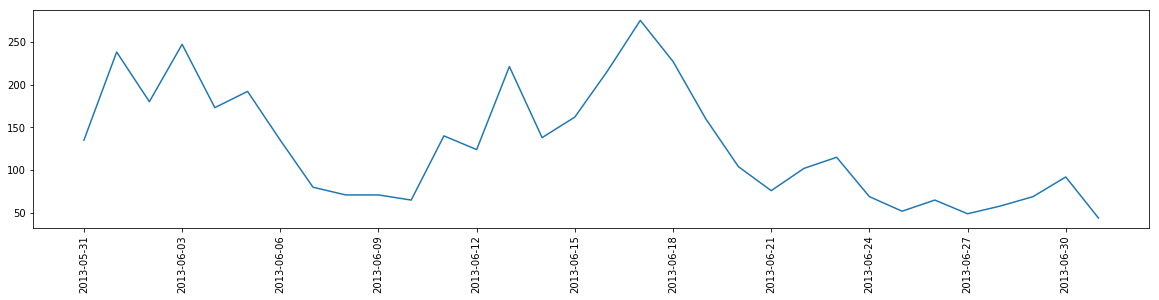

In [21]:
plt.figure(figsize=(20,4))


ticks = ['2013-05-31', '2013-06-03','2013-06-06','2013-06-09','2013-06-12','2013-06-15','2013-06-18','2013-06-21','2013-06-24','2013-06-27','2013-06-30']
#
plt.plot(Gdelt_turkey_2013_dt['AvgTone'].resample("D", how='count'))
plt.xticks(ticks,ticks, rotation='vertical')
plt.show()

# Mapping geotagged incidents in GDELT

In [24]:
istanbul_map = geopd.read_file("Data/istanbul_turkey.imposm-shapefiles/istanbul_turkey_osm_admin.shp")

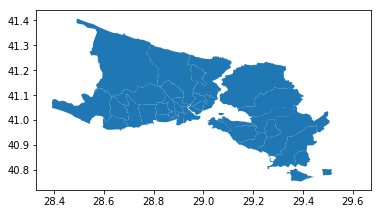

In [25]:
istanbul_map.plot()

In [40]:
istanbul_map

,id,osm_id,name,type,admin_leve,geometry
0,1,-1211204.0,ÃayÄ±rova,administrative,6.0,"POLYGON ((29.36230935432823 40.81645655992122,..."
1,2,-1765891.0,BahÃ§ekÃ¶y,administrative,6.0,"POLYGON ((28.94776959238925 41.20340569500294,..."
2,3,-1276035.0,PaÅakÃ¶y,administrative,8.0,"POLYGON ((29.26220084814665 41.00481996863542,..."
3,4,-1276010.0,Tuzla,administrative,6.0,"POLYGON ((29.25457909977195 40.81456166307078,..."
4,5,-1276012.0,Sultanbeyli,administrative,6.0,"POLYGON ((29.24469867994907 40.966230859891, 2..."
5,6,-1765896.0,ÅiÅli,administrative,6.0,"POLYGON ((28.96174968487333 41.05355143167688,..."
6,7,-1766095.0,BahÃ§elievler,administrative,6.0,"POLYGON ((28.80595709460593 41.01690147623165,..."
7,8,-1276013.0,Kartal,administrative,6.0,"POLYGON ((29.13871362145252 40.90621492442608,..."
8,9,-1766097.0,BayrampaÅa,administrative,6.0,"POLYGON ((28.8784443799837 41.07079795182767, ..."
9,10,-1765894.0,KaÄÄ±thane,administrative,6.0,"POLYGON ((28.9481769528835 41.06432117142646, ..."


In [45]:
GDELT_points

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,Event_date_dt,points
Event_date_dt,,,,,,,,,,,,,,,,,,,,,
2013-06-05,255663475,20130605,201306,2013,2013.4247,EDU,STUDENT,NaN,NaN,NaN,...,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.bbc.co.uk/news/world-europe-22753761,2013-06-05,POINT (44.2167 37.7667)
2013-06-05,255683531,20130605,201306,2013,2013.4247,TUR,TURKISH,TUR,NaN,NaN,...,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.latimes.com/news/world/worldnow/la-...,2013-06-05,POINT (44.2167 37.7667)
2013-06-05,255683534,20130605,201306,2013,2013.4247,TUR,TURKEY,TUR,NaN,NaN,...,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://learning.blogs.nytimes.com/2013/06/05/p...,2013-06-05,POINT (44.2167 37.7667)
2013-06-05,255674072,20130605,201306,2013,2013.4247,LAB,TRADE UNION,NaN,NaN,NaN,...,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://news.yahoo.com/live-occupied-gezi-park-...,2013-06-05,POINT (44.2167 37.7667)
2013-06-05,255667402,20130605,201306,2013,2013.4247,GOV,GOVERNMENT,NaN,NaN,NaN,...,"Gezi, Van, Turkey",TU,TU65,37.7667,44.2167,-749742,20130605,http://www.nzherald.co.nz/world/news/article.c...,2013-06-05,POINT (44.2167 37.7667)
2013-06-05,255679102,20130605,201306,2013,2013.4247,OPP,DEMONSTRATOR,NaN,NaN,NaN,...,"Hatay, Hatay, Turkey",TU,TU31,36.2066,36.1572,-735345,20130605,http://www.news.az/articles/80273,2013-06-05,POINT (36.1572 36.2066)
2013-06-05,255667399,20130605,201306,2013,2013.4247,GOV,GOVERNMENT,NaN,NaN,NaN,...,"Hatay, Hatay, Turkey",TU,TU31,36.2066,36.1572,-735345,20130605,http://thestar.com.my/news/story.asp?file=/201...,2013-06-05,POINT (36.1572 36.2066)
2013-06-05,255658138,20130605,201306,2013,2013.4247,BUS,BANK,NaN,NaN,NaN,...,"Dogus, Mardin, Turkey",TU,TU72,37.1953,41.0406,-746770,20130605,http://www.nzherald.co.nz/world/news/article.c...,2013-06-05,POINT (41.0406 37.1953)
2013-06-05,255674071,20130605,201306,2013,2013.4247,LAB,TRADE UNION,NaN,NaN,NaN,...,"Ankara, Ankara, Turkey",TU,TU68,39.9272,32.8644,-735338,20130605,"http://www.ynetnews.com/articles/0,7340,L-4388...",2013-06-05,POINT (32.8644 39.9272)


In [30]:
#create Point type for the inicdents in GEDELt incidents of interest
events_points = Gdelt_turkey_2013_dt[["ActionGeo_Long","ActionGeo_Lat"]].apply(lambda x: Point(x['ActionGeo_Long'], x['ActionGeo_Lat']), axis = 1)

In [31]:
Gdelt_turkey_2013_dt['points'] = events_points

In [32]:
GDELT_points = geopd.GeoDataFrame(Gdelt_turkey_2013_dt, geometry='points')

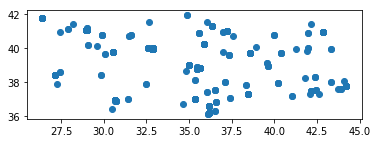

In [33]:
GDELT_points.plot()

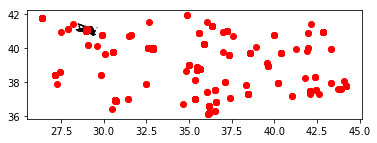

In [44]:
ax = istanbul_map.plot(color='white', edgecolor='black')
GDELT_points.plot(ax=ax, color='red')
plt.show()

In [50]:
world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))

In [58]:
world[world['name'] == 'Turkey']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
162,76805524.0,Asia,Turkey,TUR,902700.0,(POLYGON ((36.91312706884216 41.33535838476431...


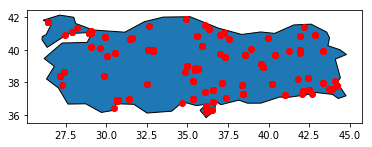

In [55]:
ax = world[world['name'] == 'Turkey'].plot(edgecolor='black')
#ax = istanbul_map.plot(color='white', edgecolor='black')
GDELT_points.plot(ax=ax, color='red')
plt.show()